<a href="https://colab.research.google.com/github/PaulaLuana/aprendizado-de-maquina/blob/main/classificao_iris_e_cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/machine-learning/datasets/Iris.csv')

In [ ]:
df_iris = df_iris.iloc[:,1:]

In [ ]:
df_iris.rename(columns={'SepalLengthCm': 'sepal_comprimento', 'SepalWidthCm' : 'sepal_largura', 'PetalLengthCm' : 'petal_comprimento', 'PetalWidthCm' : 'petal_largura', 'Species' : 'tipo'}, inplace=True)

In [ ]:
def minmax_norm(df_input):
    return (df_input-df_input.min())/(df_input.max()-df_input.min())

In [ ]:
tipos = df_iris.iloc[:,-1]
tipos.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df_iris = minmax_norm(df_iris.iloc[:,:-1])
df_iris

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
df_iris['tipo'] = tipos
df_iris['tipo'] = df_iris['tipo'].map({'Iris-setosa':0,
                             'Iris-versicolor':1,
                             'Iris-virginica':2,
                             np.nan:0},
                             na_action=None)

In [ ]:
df_iris.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,1.000000
std,0.230018,0.180664,0.299054,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
df_iris.columns

Index(['sepal_comprimento', 'sepal_largura', 'petal_comprimento',
       'petal_largura', 'tipo'],
      dtype='object')

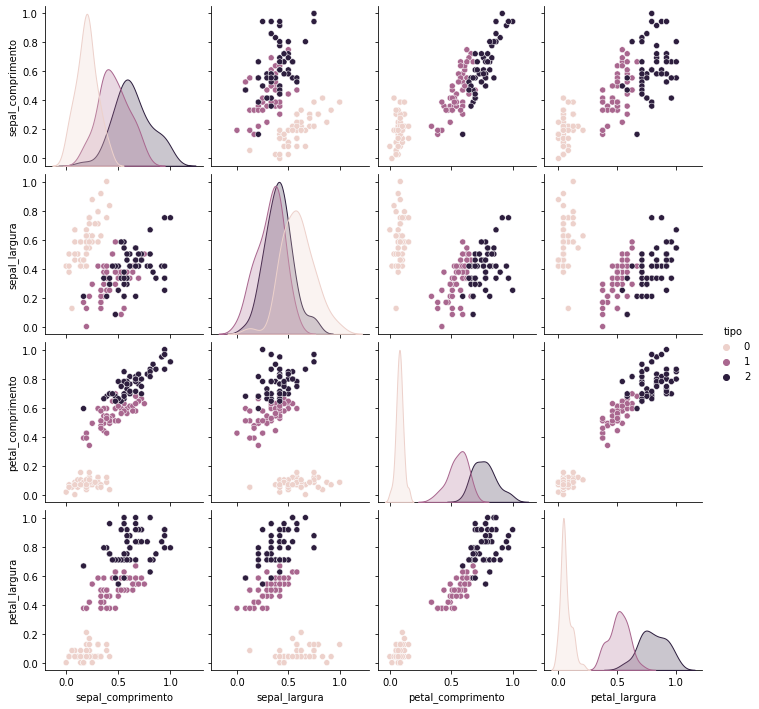

In [ ]:
sns.pairplot(df_iris, hue='tipo');

## Classificacao por media

In [ ]:
class ClassificationMean:
  def __init__(self):
    self.medias = list()
    self.pred = list()

  def fit(self, data, labels):
    self.classes = labels.unique()
    
    for column in self.classes:
      self.medias.append(data[(labels==column)].mean(numeric_only=True).values)
    
  def predict(self, X_test):
    for row in X_test.index:
      somas = np.zeros(3)
      j = 0
      tamanho = len(X_test.columns)
      for media in self.medias:
        linha_atual = X_test.iloc[row,:].values
        dif = [abs(media[t] - linha_atual[t]) for t in np.arange(tamanho)]
        somas[j] = np.sum(dif)
        j += 1
      menor = somas.argmin()
      self.pred.append(menor)
    return self.pred


In [ ]:
df_iris.head(1)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,0.222222,0.625,0.067797,0.041667,0


**Train & Test**



In [ ]:
embaralhado = df_iris.sample(frac=1).reset_index(drop=True)
embaralhado.head(5)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,0.805556,0.416667,0.813559,0.625000,2
1,0.555556,0.125000,0.576271,0.500000,1
2,0.333333,0.916667,0.067797,0.041667,0
3,0.305556,0.583333,0.118644,0.041667,0
4,0.166667,0.458333,0.084746,0.000000,0


In [ ]:
n_train = int(round(len(embaralhado) * 0.75))
X_train_iris = embaralhado.iloc[:n_train,:-1]
Y_train_iris = embaralhado.iloc[:n_train,-1]
X_test_iris = embaralhado.iloc[n_train:,:-1]
X_test_iris.reset_index(drop=True, inplace=True)
Y_test_iris = embaralhado.iloc[n_train:,-1]
Y_test_iris.reset_index(drop=True, inplace=True)

**Classificacao**

In [ ]:
model = ClassificationMean()

In [ ]:
model.fit(X_train_iris, Y_train_iris)

In [ ]:
pred = model.predict(X_test_iris)

**Acuracia**

In [ ]:
accs = list()

In [ ]:
acertos = np.sum([1 for i in np.arange(38) if pred[i] == Y_test_iris[i]])
acc = acertos/38
accs.append(acc)
acc

0.2631578947368421

## Classificacao por mediana

In [ ]:
class ClassificationMedian:
  def __init__(self):
    self.medias = list()
    self.pred = list()

  def fit(self, data, labels):
    self.classes = labels.unique()
  
    for column in self.classes:
      self.medias.append(data[(labels==column)].median(numeric_only=True).values)
      
  def predict(self, X_test):
    for row in X_test.index:
      somas = np.zeros(3)
      j = 0
      tamanho = len(X_test.columns)
      for i in self.medias:
        array1 = X_test.iloc[row,:].values
        array2 = i
        dif = [abs(array2[t] - array1[t]) for t in np.arange(tamanho)]
        somas[j] = np.sum(dif)
        j += 1
      menor = somas.argmin()
      self.pred.append(menor)
    return self.pred


**Classificacao**

In [ ]:
model = ClassificationMedian()

In [ ]:
model.fit(X_train_iris, Y_train_iris)

In [ ]:
pred = model.predict(X_test_iris)

**Acuracia**

In [ ]:
acertos = np.sum([1 for i in np.arange(38) if pred[i] == Y_test_iris[i]])
acc = acertos/38
accs.append(acc)
acc

0.2631578947368421

In [ ]:
df_iris.corr()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
sepal_comprimento,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_largura,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_comprimento,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_largura,0.817954,-0.356544,0.962757,1.000000,0.956464
tipo,0.782561,-0.419446,0.949043,0.956464,1.000000


## Classificacao (comprimento da petala, largura da petala)

Calcular a distancia euclidiana com os pontos medios dos tipos de flores.

In [ ]:
class ClassificationPetala:
  def fit(self, data, labels):
    self.pontos = list()
    self.classes = labels.unique()
    for classe in self.classes:
      self.pontos.append(tuple(data[(labels==classe)].mean()))
  
  def predict(self, X_test):
    self.pred = list()
    data = [tuple(x) for x in X_test.values]
    qclass = len(self.classes)
    for row in data:
      distancia = np.zeros(qclass)
      for i in np.arange(qclass):
        distancia[i] = (np.linalg.norm(np.subtract(self.pontos[i], row)))
      self.pred.append(distancia.argmin()) 
    return self.pred

**Train & Test**

In [ ]:
X_train_iris_ = embaralhado.iloc[:n_train,2:-1]
Y_train_iris_ = embaralhado.iloc[:n_train,-1]
X_test_iris_ = embaralhado.iloc[n_train:,2:-1]
X_test_iris_.reset_index(drop=True, inplace=True)
Y_test_iris_ = embaralhado.iloc[n_train:,-1]
Y_test_iris_.reset_index(drop=True, inplace=True)

In [ ]:
model = ClassificationPetala()

In [ ]:
model.fit(X_train_iris_, Y_train_iris_)

In [ ]:
pred = model.predict(X_test_iris_)

In [ ]:
acertos = np.sum([1 for i in np.arange(38) if pred[i] == Y_test_iris_[i]])
acc = acertos/38
accs.append(acc)
acc

0.2631578947368421

## Resultados(Iris)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
accs

[0.2631578947368421, 0.2631578947368421, 0.2631578947368421]

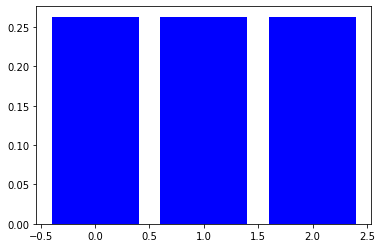

In [ ]:
x = range(len(accs))

plt.bar(x, accs, color='b')
plt.show()

# Detecção de câncer de mama

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/machine-learning/datasets/cancer.csv')

In [ ]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data = data.iloc[:,1:-1]

In [ ]:
data.iloc[:,1:].columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
for column in data.iloc[:,1:].columns:
  data[column].fillna(value=data[column].mean(),inplace=True)

In [ ]:
data = data.reindex(columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'])


**Normalizado**

In [ ]:
labels_cancer = data['diagnosis']
data = minmax_norm(data.iloc[:,:-1])
data['diagnosis'] = labels_cancer

In [ ]:
embaralhado = data.sample(frac=1).reset_index(drop=True)
embaralhado.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.169545,...,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041,B
1,0.239907,0.439973,0.241587,0.129077,0.150943,0.269677,0.186106,0.148012,0.072222,0.350253,...,0.444829,0.184023,0.074518,0.111074,0.285347,0.232588,0.375258,0.123398,0.252197,B


In [ ]:
n_train = int(round(len(embaralhado) * 0.75))
X_train_cancer = embaralhado.iloc[:n_train,:-1]
Y_train_cancer = embaralhado.iloc[:n_train,-1]
X_test_cancer = embaralhado.iloc[n_train:,:-1]
X_test_cancer.reset_index(drop=True, inplace=True)
Y_test_cancer = embaralhado.iloc[n_train:,-1]
Y_test_cancer.reset_index(drop=True, inplace=True)

### Classificacao por media

In [ ]:
model = ClassificationMean()

In [ ]:
model.fit(X_train_cancer, Y_train_cancer)

In [ ]:
pred = model.predict(X_test_cancer)

In [ ]:
accs_ = list()

In [ ]:
acertos = np.sum([1 for i in np.arange(len(Y_test_cancer)) if pred[i] == Y_test_cancer[i]])
acc = acertos/len(Y_test_cancer)
accs_.append(acc)
acc

0.0